In [ ]:
# Importar biblioteca
import seaborn as sns
import pandas as pd

Veamos un conjunto de datos de ejemplo sobre propinas en restaurantes. Supongamos que queremos crear un gráfico de barras apiladas que muestre el porcentaje de puntos de datos para cada tamaño de grupo cada día. Se deben cargar los datos y  hacer una tabulación cruzada por día y tamaño del grupo. La función pandas.crosstab es una forma práctica de calcular una tabla de frecuencias simple a partir de dos columnas de *DataFrame*:

In [ ]:
propinas = sns.load_dataset("tips")
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
propinas.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
propinas.value_counts("day")

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
propinas.value_counts("time")

,count
time,
Dinner,176
Lunch,68


In [ ]:
propinas.value_counts("size")

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


In [ ]:
totales = pd.crosstab(propinas["day"], propinas["size"])
totales = totales.reindex(index=["Thur", "Fri", "Sat", "Sun"])
totales

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


Como no hay muchos grupos de una o seis personas, se eliminan aquí:

In [ ]:
totales = totales.loc[:, 2:5]
totales

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


Luego, es necesario normalizar de manera que cada fila sume 1 y crear el gráfico.

In [ ]:
# Normalizar para que la suma sea igual a 1
totales_normal = totales.div(totales.sum(axis="columns"), axis="index")
totales_normal

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

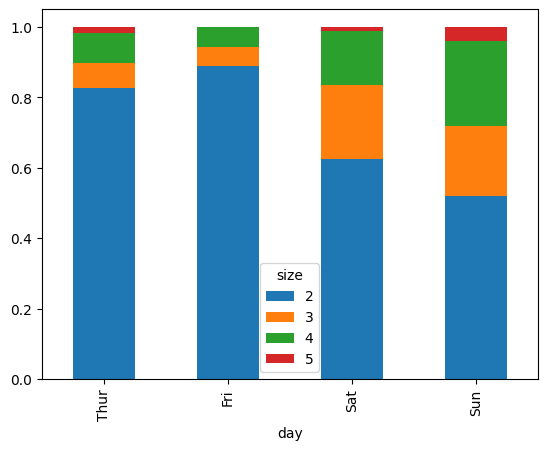

In [ ]:
totales_normal.plot.bar(stacked=True)

Con datos que requieren agregación o resumen antes de crear un gráfico, usar el paquete *seaborn* puede simplificar mucho las cosas. Veamos ahora el porcentaje de propinas por día con *seaborn*:

In [ ]:
propinas["propinas_porcentaje"] = propinas["tip"] / (propinas["total_bill"] - propinas["tip"])
propinas

,total_bill,tip,sex,smoker,day,time,size,propinas_totales,propinas_porcentaje
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,0.172069
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,0.108899


In [ ]:
propinas.describe()

,total_bill,tip,size,propinas_totales,propinas_porcentaje
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.202123,0.202123
std,8.902412,1.383638,0.951100,0.163385,0.163385
min,3.070000,1.000000,1.000000,0.036955,0.036955
25%,13.347500,2.000000,2.000000,0.148274,0.148274
50%,17.795000,2.900000,2.000000,0.183110,0.183110
75%,24.127500,3.562500,3.000000,0.236821,0.236821
max,50.810000,10.000000,6.000000,2.452381,2.452381


<Axes: xlabel='propinas_porcentaje', ylabel='day'>

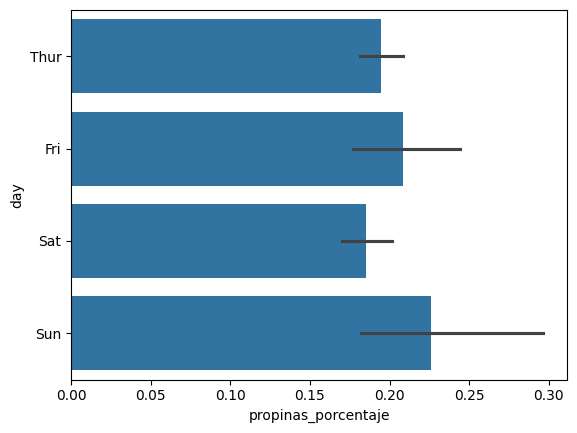

In [ ]:
sns.barplot(x="propinas_porcentaje", y="day", data=propinas, orient="h")

Las funciones gráficas en *seaborn* toman un argumento de datos, que puede ser un *DataFrame* de pandas. Los demás argumentos se refieren a los nombres de las columnas. Dado que hay múltiples observaciones para cada valor del día, las barras representan el valor promedio de *propina_porcentaje*.
Las líneas negras dibujadas en las barras representan el intervalo de confianza del 95 % (esto se puede configurar mediante argumentos opcionales).

<Axes: xlabel='propinas_porcentaje', ylabel='day'>

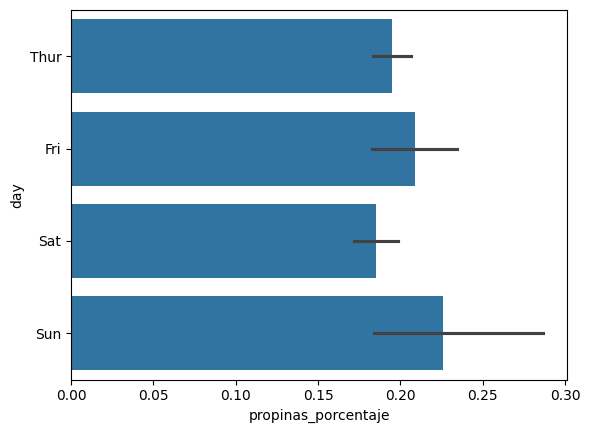

In [ ]:
sns.barplot(x="propinas_porcentaje", y="day", data=propinas, orient="h", errorbar=('ci', 90))

*seaborn.barplot* tiene una opción de tono (*hue*) que nos permite dividir por un valor categórico adicional.

In [ ]:
propinas.value_counts("time")

,count
time,
Dinner,176
Lunch,68


<Axes: xlabel='propinas_porcentaje', ylabel='day'>

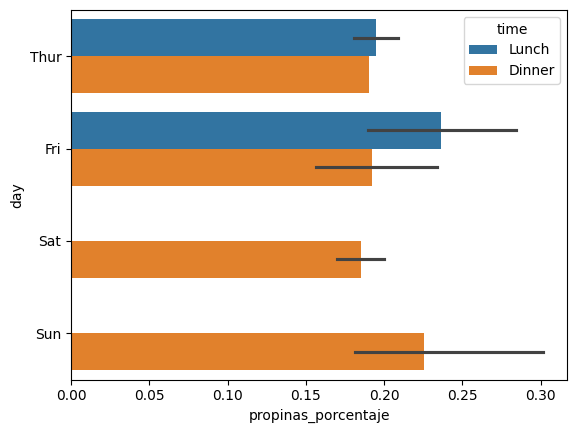

In [ ]:
sns.barplot(x="propinas_porcentaje", y="day", hue="time", data=propinas, orient="h")

*seaborn* cambió automáticamente la estética del gráfico: la paleta de colores predeterminada, el fondo del gráfico y los colores de las líneas de cuadrícula. Es posible cambiar entre diferentes apariencias de gráfico usando *seaborn.set_style*. Al crear gráficos para impresión en blanco y negro, puede resultar útil establecer una paleta de colores en escala de grises, como se muestra a continuación:

<Axes: xlabel='propinas_porcentaje', ylabel='day'>

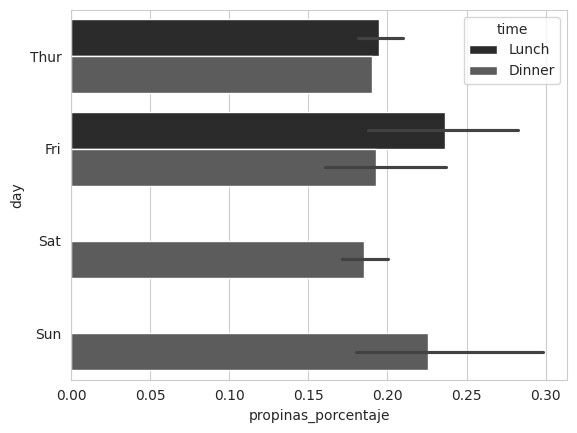

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(x="propinas_porcentaje", y="day", hue="time", data=propinas, orient="h")

Utilizando los datos de propinas anteriores, podemos crear un histograma de los porcentajes de propinas sobre la factura total utilizando el método *plot.hist* en la serie.

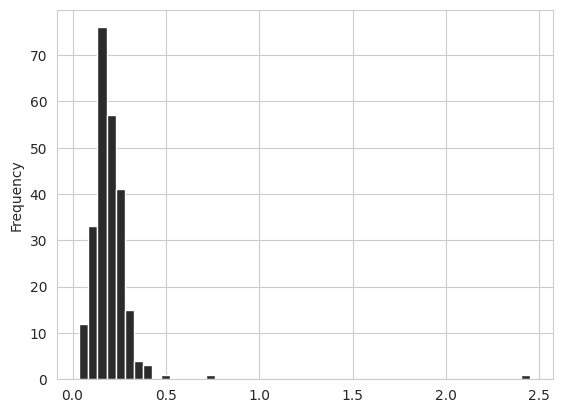

In [ ]:
propinas["propinas_porcentaje"].plot.hist(bins=50);

<Axes: xlabel='day', ylabel='total_bill'>

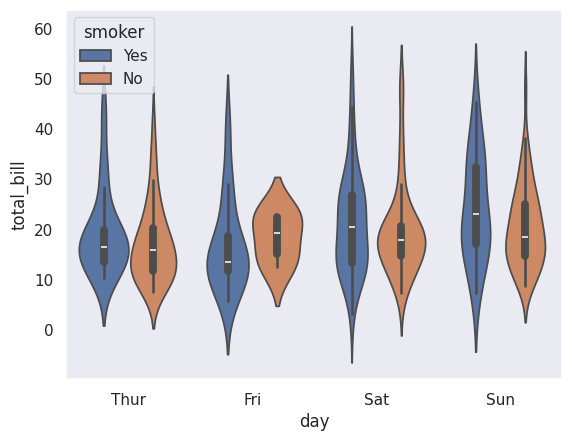

In [ ]:
sns.set_theme(style="dark")
sns.violinplot(data=propinas, x="day", y="total_bill", hue="smoker")

<Axes: xlabel='day', ylabel='total_bill'>

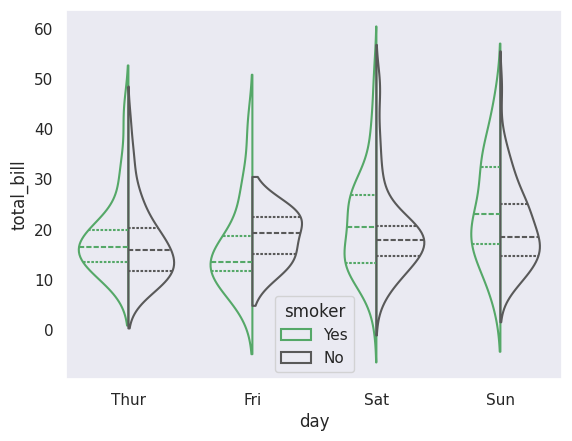

In [ ]:
sns.violinplot(data=propinas, x="day", y="total_bill", hue="smoker", split=True, inner="quart", fill=False, palette={"Yes":"g", "No":".35"})